In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import seaborn as sns

from skimage.io import imread, imsave

from toskipornot.features.analyze_features import *
from toskipornot.data.utils import compute_and_plot_histogram, make_blurry_background_image, make_speckle_image

test_indices = [
            110,
            545,
            519,
            61,
            470,
            254,
            564,
            411,
            189,
            546,
            365,
            83,
            58,
            130,
            50,
            224,
            11,
            410,
            31,
            157,
            505,
            325,
            126,
            624,
            344,
            190,
            354,
            246,
            443,
            572,
            494,
            106,
            7,
            84,
            48,
            424,
            139,
            148,
            534,
            282,
            179,
            27,
            375,
            532,
            330,
            209,
            332,
            244,
            232,
            526,
            555,
            397,
            221,
            606,
            99,
            373,
            383,
            180,
            161,
            542,
            360,
            580,
            13,
            163,
            128,
            448,
            45,
            56,
            464,
            557,
            65,
            642,
            327,
            393,
            413,
            598,
            359,
            71,
            439,
            502,
            30,
            121,
            74,
            134,
            125,
            253,
            228,
            21,
            178,
            634,
            320,
            610,
            208,
            577,
            255,
            288,
            482,
            67,
            156,
            292,
            34,
            535,
            170,
            314,
            582,
            432,
            544,
            153,
            76,
            119,
            183,
            394,
            574,
            166,
            122,
            510,
            316,
            37,
            17,
            294,
            465,
            561,
            15,
            429,
            627,
            499,
            513,
            478,
            70,
            116,
            453,
            560,
            539,
            596,
            498,
            415,
            509,
            626,
            238,
            342,
            28,
            167,
            389,
            524,
            168,
            329,
            605
        ]

/Users/amithkamath/opt/anaconda3/envs/geomvar-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
generate_data = False

root_dir = "../"
input_folder = "BUSI-processed"
output_folder = "BUSI-experiment"

In [3]:
medical_data_path = os.path.join(root_dir, "data", input_folder)

medical_data_images = os.path.join(medical_data_path, "image")
all_image_data = sorted(glob(os.path.join(medical_data_images, "*.png")))
image_data = [all_image_data[i-1] for i in test_indices] # start from 1 in config/indices.

medical_data_labels = os.path.join(medical_data_path, "label")
all_label_data = sorted(glob(os.path.join(medical_data_labels, "*.png")))
label_data = [all_label_data[i-1] for i in test_indices]

100%|██████████| 147/147 [00:02<00:00, 57.12it/s]


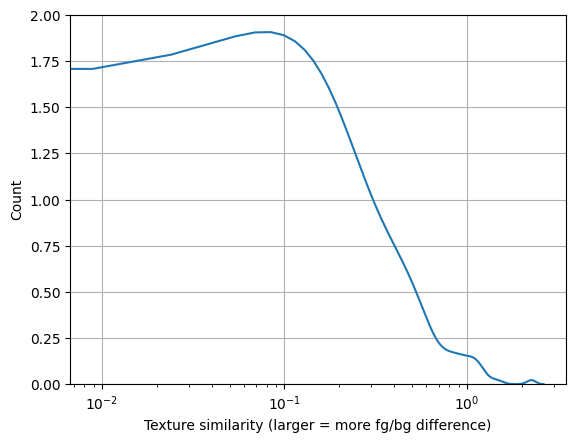

In [4]:
texture_similarity = compute_and_plot_histogram(image_data, label_data)

in_domain_output_path = os.path.join(root_dir, "data", output_folder, "in-domain", "test")
os.makedirs(os.path.join(in_domain_output_path, "image"), exist_ok=True)
os.makedirs(os.path.join(in_domain_output_path, "label"), exist_ok=True)
if generate_data:
    n_images = len(image_data)
    for image_index in tqdm(range(n_images)):
        image = imread(image_data[image_index])
        label = imread(label_data[image_index])

        imsave(os.path.join(in_domain_output_path, "image", "image_" + str(image_index).zfill(4) + ".png"), image)
        imsave(os.path.join(in_domain_output_path, "label", "label_" + str(image_index).zfill(4) + ".png"), label)

100%|██████████| 147/147 [00:02<00:00, 62.99it/s]


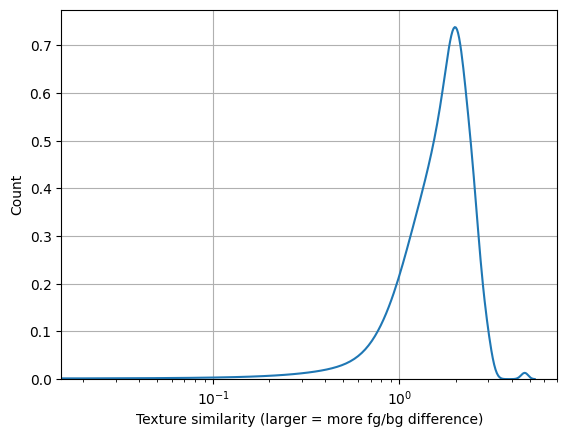

In [5]:
higher_output_path = os.path.join(root_dir, "data", output_folder, "higher", "test")
os.makedirs(os.path.join(higher_output_path, "image"), exist_ok=True)
os.makedirs(os.path.join(higher_output_path, "label"), exist_ok=True)

sigma = 7.0

if generate_data:
    n_images = len(image_data)
    for image_index in tqdm(range(n_images)):
        mod_image, label = make_blurry_background_image(image_data[image_index], label_data[image_index], sigma)

        imsave(os.path.join(higher_output_path, "image", "image_" + str(image_index).zfill(4) + ".png"), mod_image)
        imsave(os.path.join(higher_output_path, "label", "label_" + str(image_index).zfill(4) + ".png"), label)

modified_higher_data_images = os.path.join(higher_output_path, "image")
modified_higher_image_data = sorted(glob(os.path.join(modified_higher_data_images, "*.png")))

modified_higher_data_labels = os.path.join(higher_output_path, "label")
modified_higher_label_data = sorted(glob(os.path.join(modified_higher_data_labels, "*.png")))

modified_higher_texture_similarity = compute_and_plot_histogram(modified_higher_image_data, modified_higher_label_data)

100%|██████████| 147/147 [00:02<00:00, 61.69it/s]


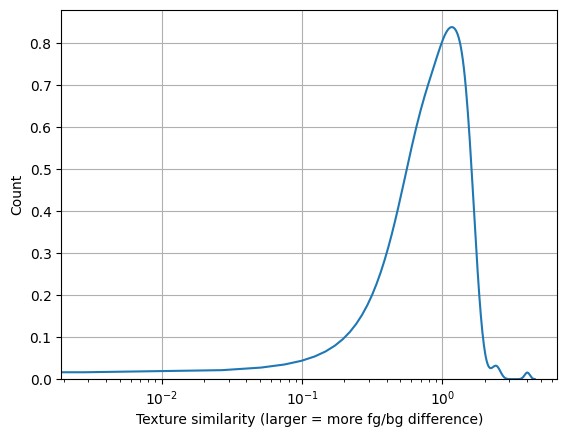

In [6]:
high_output_path = os.path.join(root_dir, "data", output_folder, "high", "test")
os.makedirs(os.path.join(high_output_path, "image"), exist_ok=True)
os.makedirs(os.path.join(high_output_path, "label"), exist_ok=True)

sigma = 3.0

if generate_data:
    n_images = len(image_data)
    for image_index in tqdm(range(n_images)):
        mod_image, label = make_blurry_background_image(image_data[image_index], label_data[image_index], sigma)

        imsave(os.path.join(high_output_path, "image", "image_" + str(image_index).zfill(4) + ".png"), mod_image)
        imsave(os.path.join(high_output_path, "label", "label_" + str(image_index).zfill(4) + ".png"), label)

modified_high_data_images = os.path.join(high_output_path, "image")
modified_high_image_data = sorted(glob(os.path.join(modified_high_data_images, "*.png")))

modified_high_data_labels = os.path.join(high_output_path, "label")
modified_high_label_data = sorted(glob(os.path.join(modified_high_data_labels, "*.png")))

modified_high_texture_similarity = compute_and_plot_histogram(modified_high_image_data, modified_high_label_data)

100%|██████████| 147/147 [00:02<00:00, 59.13it/s]


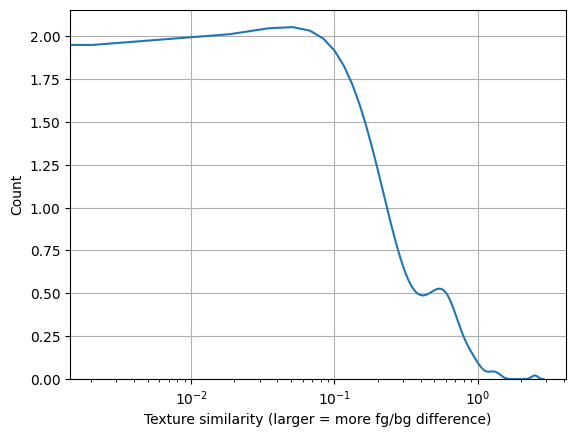

In [7]:
low_output_path = os.path.join(root_dir, "data", output_folder, "low", "test")
os.makedirs(os.path.join(low_output_path, "image"), exist_ok=True)
os.makedirs(os.path.join(low_output_path, "label"), exist_ok=True)

speckle_var = 0.1

if generate_data:
    n_images = len(image_data)
    for image_index in tqdm(range(n_images)):
        mod_image, label = make_speckle_image(image_data[image_index], label_data[image_index], speckle_var)

        imsave(os.path.join(low_output_path, "image", "image_" + str(image_index).zfill(4) + ".png"), mod_image)
        imsave(os.path.join(low_output_path, "label", "label_" + str(image_index).zfill(4) + ".png"), label)

modified_low_data_images = os.path.join(low_output_path, "image")
modified_low_image_data = sorted(glob(os.path.join(modified_low_data_images, "*.png")))

modified_low_data_labels = os.path.join(low_output_path, "label")
modified_low_label_data = sorted(glob(os.path.join(modified_low_data_labels, "*.png")))

modified_low_texture_similarity = compute_and_plot_histogram(modified_low_image_data, modified_low_label_data)

100%|██████████| 147/147 [00:02<00:00, 58.78it/s]


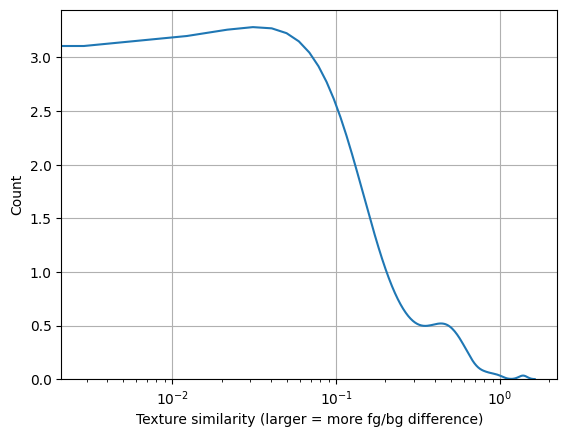

In [8]:
lower_output_path = os.path.join(root_dir, "data", output_folder, "lower", "test")
os.makedirs(os.path.join(lower_output_path, "image"), exist_ok=True)
os.makedirs(os.path.join(lower_output_path, "label"), exist_ok=True)

speckle_var = 0.3

if generate_data:
    n_images = len(image_data)
    for image_index in tqdm(range(n_images)):
        mod_image, label = make_speckle_image(image_data[image_index], label_data[image_index], speckle_var)

        imsave(os.path.join(lower_output_path, "image", "image_" + str(image_index).zfill(4) + ".png"), mod_image)
        imsave(os.path.join(lower_output_path, "label", "label_" + str(image_index).zfill(4) + ".png"), label)

modified_lower_data_images = os.path.join(lower_output_path, "image")
modified_lower_image_data = sorted(glob(os.path.join(modified_lower_data_images, "*.png")))

modified_lower_data_labels = os.path.join(lower_output_path, "label")
modified_lower_label_data = sorted(glob(os.path.join(modified_lower_data_labels, "*.png")))

modified_lower_texture_similarity = compute_and_plot_histogram(modified_lower_image_data, modified_lower_label_data)

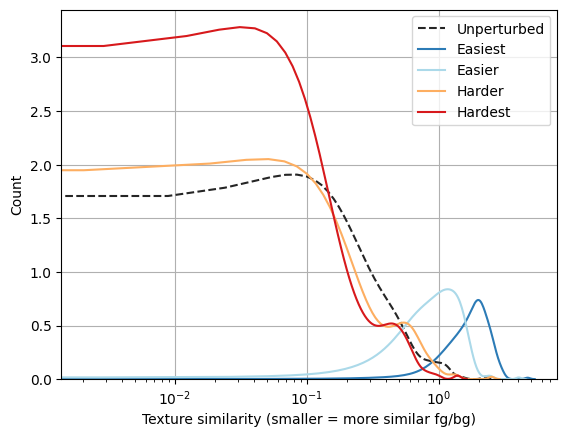

In [9]:
fig, ax = plt.subplots()
plot = sns.kdeplot(data=texture_similarity, linestyle="dashed")
plot = sns.kdeplot(data=modified_higher_texture_similarity)
plot = sns.kdeplot(data=modified_high_texture_similarity)
plot = sns.kdeplot(data=modified_low_texture_similarity)
plot = sns.kdeplot(data=modified_lower_texture_similarity)
cm = sns.color_palette("plasma", 3)

c_idx = 0
for line in ax.lines:
    if c_idx == 0:
        line.set_color("#252525")
    elif c_idx == 1:
        line.set_color("#2c7bb6")
    elif c_idx == 2:
        line.set_color("#abd9e9")
    elif c_idx == 3:
        line.set_color("#fdae61")
    elif c_idx == 4:
        line.set_color("#d7191c")
    c_idx += 1

plt.xlabel("Texture similarity (smaller = more similar fg/bg)")
plt.ylabel("Count")
plt.xscale("log")
plt.grid()
plt.legend(("Unperturbed", "Easiest", "Easier", "Harder", "Hardest"))
plt.show()